In [49]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats as st
%matplotlib inline

In [2]:
federer = pd.read_csv('federer.csv', date_parser=['start date'], dayfirst = True)

In [11]:
federer.head()

,Unnamed: 0,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,...,player2 2nd serve return points total,player2 break points converted won,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total
0,0,1998,"Basel, Switzerland",1998-10-05,WS,Indoor: Hard,Draw: 32,1,396.0,"$9,800",...,22.0,4.0,8.0,8.0,36.0,50.0,26.0,53.0,62.0,103.0
1,1,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",...,19.0,0.0,1.0,8.0,33.0,65.0,8.0,41.0,41.0,106.0
2,2,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",...,30.0,0.0,4.0,10.0,46.0,75.0,23.0,73.0,69.0,148.0
3,3,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",...,28.0,3.0,10.0,10.0,44.0,63.0,26.0,67.0,70.0,130.0
4,4,1998,"Geneva, Switzerland",1998-08-24,CH,Outdoor: Clay,Draw: 32,1,680.0,$520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
federer.columns[1]

'year'

In [21]:
federer = federer.drop('Unnamed: 0', axis = 'columns')

In [22]:
len(federer.columns)

70

In [23]:
federer.loc[:,federer.columns[:4]].tail()

,year,tournament,start date,type
1174,2012,"Australian Open, Australia",2012-01-16,GS
1175,2012,"Doha, Qatar",2012-01-02,250
1176,2012,"Doha, Qatar",2012-01-02,250
1177,2012,"Doha, Qatar",2012-01-02,250
1178,2012,"Doha, Qatar",2012-01-02,250


In [27]:
points = federer.loc[:, 'player1 total points won']/federer.loc[:, 'player1 total points total']

In [28]:
points

0       0.398058
1       0.613208
2       0.533784
3       0.461538
4            NaN
          ...   
1174    0.471014
1175    0.639535
1176    0.606061
1177    0.531792
1178         NaN
Length: 1179, dtype: float64

In [29]:
aces = federer.loc[:, 'player1 aces']/federer.loc[:, 'player1 total points total']

In [30]:
aces

0       0.038835
1       0.075472
2       0.054054
3       0.023077
4            NaN
          ...   
1174    0.039855
1175    0.046512
1176    0.020202
1177    0.069364
1178         NaN
Length: 1179, dtype: float64

(0.0, 0.1629310344827586)

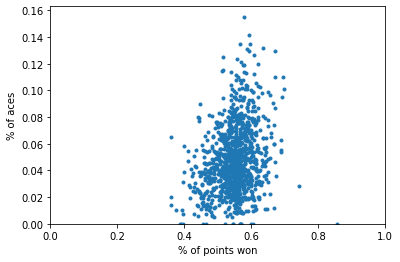

In [31]:
fig, ax = plt.subplots(1, 1)
ax.plot(points, aces, '.')
ax.set_xlabel('% of points won')
ax.set_ylabel('% of aces')
ax.set_xlim(0., 1.)
ax.set_ylim(0.)

In [32]:
federer_dis = pd.DataFrame({'points': points, 'aces': aces}).dropna()

In [33]:
federer_dis.tail()

,points,aces
1173,0.585366,0.024390
1174,0.471014,0.039855
1175,0.639535,0.046512
1176,0.606061,0.020202
1177,0.531792,0.069364


In [34]:
federer_dis.corr()

,points,aces
points,1.000000,0.255457
aces,0.255457,1.000000


In [36]:
federer.dropna().corr()

,year,atp ranking,time,player1 aces,player1 double faults,player1 1st serves in,player1 1st serves total,player1 1st serve points won,player1 1st serve points total,player1 2nd serve points won,...,player2 2nd serve return points total,player2 break points converted won,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total
year,1.000000,-0.332864,0.095311,0.095863,-0.343114,0.012756,-0.052014,0.072149,0.012756,-0.051803,...,-0.136881,-0.182944,-0.187478,0.035187,-0.007087,0.010267,-0.172374,-0.052014,-0.074579,-0.020704
atp ranking,-0.332864,1.000000,-0.058307,-0.066123,0.143011,-0.043066,-0.008880,-0.072008,-0.043066,-0.002196,...,0.041522,0.091658,0.080643,-0.054776,-0.013937,-0.037902,0.058688,-0.008880,0.014489,-0.024388
time,0.095311,-0.058307,1.000000,0.480466,0.343458,0.889068,0.927525,0.856494,0.889068,0.772286,...,0.839478,0.531688,0.569738,0.919981,0.921802,0.932684,0.800816,0.927525,0.939230,0.955933
player1 aces,0.095863,-0.066123,0.480466,1.000000,0.134748,0.556263,0.517478,0.645658,0.556263,0.393344,...,0.381955,0.022402,0.118902,0.577295,0.535681,0.527447,0.284480,0.517478,0.472504,0.537056
player1 double faults,-0.343114,0.143011,0.343458,0.134748,1.000000,0.315616,0.440779,0.270623,0.315616,0.361610,...,0.552242,0.433726,0.451348,0.341769,0.350193,0.336808,0.532971,0.440779,0.449509,0.398314
player1 1st serves in,0.012756,-0.043066,0.889068,0.556263,0.315616,1.000000,0.956428,0.961513,1.000000,0.682602,...,0.746270,0.448295,0.567079,0.925645,0.886694,0.870523,0.800860,0.956428,0.915836,0.937749
player1 1st serves total,-0.052014,-0.008880,0.927525,0.517478,0.440779,0.956428,1.000000,0.906038,0.956428,0.818523,...,0.908100,0.540171,0.654719,0.941829,0.907175,0.893571,0.889915,1.000000,0.965583,0.971735
player1 1st serve points won,0.072149,-0.072008,0.856494,0.645658,0.270623,0.961513,0.906038,1.000000,0.961513,0.653136,...,0.686587,0.278739,0.407080,0.925189,0.886812,0.868997,0.658363,0.906038,0.858170,0.911660
player1 1st serve points total,0.012756,-0.043066,0.889068,0.556263,0.315616,1.000000,0.956428,0.961513,1.000000,0.682602,...,0.746270,0.448295,0.567079,0.925645,0.886694,0.870523,0.800860,0.956428,0.915836,0.937749
player1 2nd serve points won,-0.051803,-0.002196,0.772286,0.393344,0.361610,0.682602,0.818523,0.653136,0.682602,1.000000,...,0.887094,0.298040,0.436710,0.801754,0.768930,0.758861,0.647918,0.818523,0.775327,0.809824


In [37]:
federer_dis.loc[:, 'points'].corr(federer_dis.loc[:, 'aces'])

0.25545748288799375

In [38]:
federer_dis.loc[:, 'points_result'] = (federer_dis.loc[:, 'points']>federer_dis.loc[:, 'points'].median())

In [39]:
federer_dis.loc[:, 'manyAces'] = (federer_dis.loc[:, 'aces']>federer_dis.loc[:, 'aces'].median())

In [51]:
chi2Map = pd.crosstab(federer_dis.loc[:, 'points_result'], 
                      federer_dis.loc[:, 'manyAces'])

In [53]:
chi2Map

manyAces,False,True
points_result,,
False,300,214
True,214,299


In [52]:
st.chi2_contingency(chi2Map)

(27.809858855369555,
 1.338423379963363e-07,
 1,
 array([[257.25024343, 256.74975657],
        [256.74975657, 256.25024343]]))